In [1]:
ls

drive/  sample_data/


In [2]:
%cd /content/drive/MyDrive/Manish Sir Project/Gait Work

/content/drive/MyDrive/Manish Sir Project/Gait Work


In [3]:
ls

'Gait Dataset'/   MobileNet_Gait.ipynb   NASnet_Gait.ipynb


In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras import backend as K 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.metrics import *

#from livelossplot import PlotLossesKeras

In [6]:
path = "Gait Dataset"
angles = os.listdir(path)
angles

['126', '162', '072', '018', '054', '036', '090', '144', '000', '108', '180']

In [8]:
train_dict = {"000":[], "018":[], "036":[], "054":[], "072":[], 
              "090":[], "108":[], "126":[], "144":[], "162":[], 
              "180":[]}
val_dict = {"000":[], "018":[], "036":[], "054":[], "072":[], 
              "090":[], "108":[], "126":[], "144":[], "162":[], 
              "180":[]}
for angle in angles:
  angle_path = os.path.join(path, angle)
  
  train_path = os.path.join(angle_path, "train")
  val_path = os.path.join(angle_path, "val")
  
  train_dict[angle] = train_path
  val_dict[angle] = val_path


In [9]:
print(train_dict)
print(val_dict)
train_dict["126"]

{'000': 'Gait Dataset/000/train', '018': 'Gait Dataset/018/train', '036': 'Gait Dataset/036/train', '054': 'Gait Dataset/054/train', '072': 'Gait Dataset/072/train', '090': 'Gait Dataset/090/train', '108': 'Gait Dataset/108/train', '126': 'Gait Dataset/126/train', '144': 'Gait Dataset/144/train', '162': 'Gait Dataset/162/train', '180': 'Gait Dataset/180/train'}
{'000': 'Gait Dataset/000/val', '018': 'Gait Dataset/018/val', '036': 'Gait Dataset/036/val', '054': 'Gait Dataset/054/val', '072': 'Gait Dataset/072/val', '090': 'Gait Dataset/090/val', '108': 'Gait Dataset/108/val', '126': 'Gait Dataset/126/val', '144': 'Gait Dataset/144/val', '162': 'Gait Dataset/162/val', '180': 'Gait Dataset/180/val'}


'Gait Dataset/126/train'

In [10]:
train_gen = {"000":[], "018":[], "036":[], "054":[], "072":[], 
              "090":[], "108":[], "126":[], "144":[], "162":[], 
              "180":[]}
val_gen = {"000":[], "018":[], "036":[], "054":[], "072":[], 
              "090":[], "108":[], "126":[], "144":[], "162":[], 
              "180":[]}

In [12]:
for angle in angles:
  train_datagen = ImageDataGenerator(rescale = 1./255, width_shift_range= 0.2, shear_range= 0.2)
  val_datagen = ImageDataGenerator(rescale = 1./255, width_shift_range= 0.2, shear_range= 0.2)
  
  print("working directory : ", angle)

  print(" For Training")
  train_gen[angle] = train_datagen.flow_from_directory(train_dict[angle], 
                                                       target_size = (224, 224),
                                                       batch_size = 8,
                                                       class_mode = "categorical")
  print(" For Validating")
  val_gen[angle] = val_datagen.flow_from_directory(val_dict[angle], 
                                                       target_size = (224, 224),
                                                       batch_size = 8,
                                                       class_mode = "categorical")

working directory :  126
 For Training
Found 240 images belonging to 6 classes.
 For Validating
Found 60 images belonging to 6 classes.
working directory :  162
 For Training
Found 240 images belonging to 6 classes.
 For Validating
Found 60 images belonging to 6 classes.
working directory :  072
 For Training
Found 240 images belonging to 6 classes.
 For Validating
Found 60 images belonging to 6 classes.
working directory :  018
 For Training
Found 240 images belonging to 6 classes.
 For Validating
Found 60 images belonging to 6 classes.
working directory :  054
 For Training
Found 240 images belonging to 6 classes.
 For Validating
Found 60 images belonging to 6 classes.
working directory :  036
 For Training
Found 240 images belonging to 6 classes.
 For Validating
Found 60 images belonging to 6 classes.
working directory :  090
 For Training
Found 240 images belonging to 6 classes.
 For Validating
Found 60 images belonging to 6 classes.
working directory :  144
 For Training
Found 240

In [13]:
c1=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=6, verbose=0,
    mode='auto', baseline=None, restore_best_weights=False
)

c2=tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=3, verbose=0,
    mode='auto', min_delta=0.0001, cooldown=0, min_lr=0
)

19996672/19993432 [==============================] - 0s 0us/step
Epoch 1/10
30/30 [==============================] - 141s 4s/step - loss: 1.7205 - accuracy: 0.3004 - val_loss: 1.3555 - val_accuracy: 0.5500
Epoch 2/10
30/30 [==============================] - 4s 120ms/step - loss: 1.1702 - accuracy: 0.6847 - val_loss: 1.1098 - val_accuracy: 0.6667
Epoch 3/10
30/30 [==============================] - 4s 119ms/step - loss: 0.8737 - accuracy: 0.7893 - val_loss: 0.9853 - val_accuracy: 0.6167
Epoch 4/10
30/30 [==============================] - 4s 119ms/step - loss: 0.6609 - accuracy: 0.9198 - val_loss: 0.8402 - val_accuracy: 0.7500
Epoch 5/10
30/30 [==============================] - 4s 125ms/step - loss: 0.5404 - accuracy: 0.9144 - val_loss: 0.8403 - val_accuracy: 0.7000
Epoch 6/10
30/30 [==============================] - 4s 119ms/step - loss: 0.4968 - accuracy: 0.9141 - val_loss: 0.7738 - val_accuracy: 0.7667
Epoch 7/10
30/30 [==============================] - 4s 119ms/step - loss: 0.4331 - a

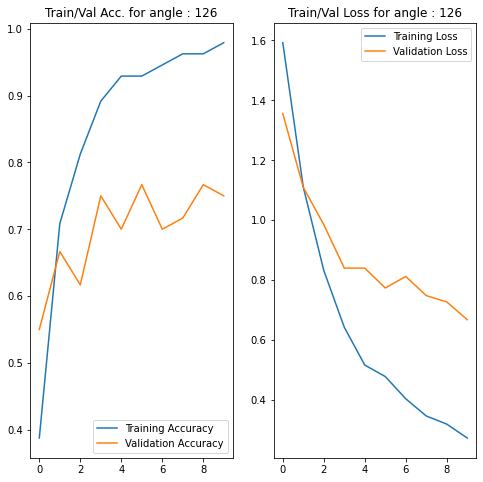

Epoch 1/10
30/30 [==============================] - 137s 4s/step - loss: 1.7991 - accuracy: 0.2799 - val_loss: 1.4178 - val_accuracy: 0.5500
Epoch 2/10
30/30 [==============================] - 4s 124ms/step - loss: 1.3019 - accuracy: 0.5316 - val_loss: 1.2636 - val_accuracy: 0.6667
Epoch 3/10
30/30 [==============================] - 4s 129ms/step - loss: 0.9769 - accuracy: 0.7591 - val_loss: 1.2457 - val_accuracy: 0.5167
Epoch 4/10
30/30 [==============================] - 4s 132ms/step - loss: 0.9032 - accuracy: 0.7662 - val_loss: 1.1624 - val_accuracy: 0.6000
Epoch 5/10
30/30 [==============================] - 4s 123ms/step - loss: 0.7562 - accuracy: 0.7614 - val_loss: 1.1581 - val_accuracy: 0.5833
Epoch 6/10
30/30 [==============================] - 4s 125ms/step - loss: 0.7053 - accuracy: 0.8258 - val_loss: 1.0794 - val_accuracy: 0.6833
Epoch 7/10
30/30 [==============================] - 4s 127ms/step - loss: 0.5964 - accuracy: 0.8843 - val_loss: 1.1338 - val_accuracy: 0.5833
Epoch 8

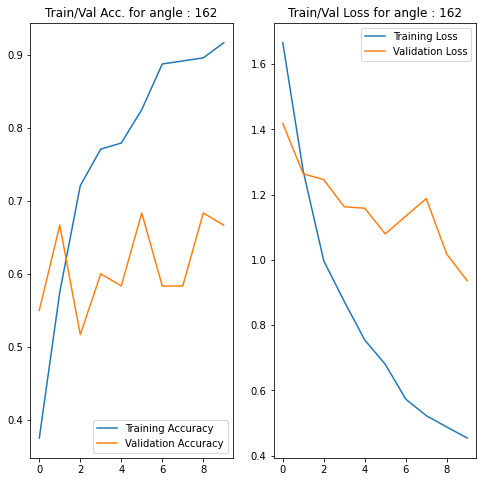

Epoch 1/10
30/30 [==============================] - 130s 4s/step - loss: 1.8211 - accuracy: 0.1641 - val_loss: 1.6221 - val_accuracy: 0.3167
Epoch 2/10
30/30 [==============================] - 4s 122ms/step - loss: 1.3292 - accuracy: 0.6473 - val_loss: 1.4168 - val_accuracy: 0.5667
Epoch 3/10
30/30 [==============================] - 4s 122ms/step - loss: 1.1008 - accuracy: 0.7871 - val_loss: 1.2580 - val_accuracy: 0.5833
Epoch 4/10
30/30 [==============================] - 4s 124ms/step - loss: 0.8759 - accuracy: 0.8876 - val_loss: 1.2323 - val_accuracy: 0.6333
Epoch 5/10
30/30 [==============================] - 4s 122ms/step - loss: 0.7797 - accuracy: 0.9029 - val_loss: 1.2113 - val_accuracy: 0.6000
Epoch 6/10
30/30 [==============================] - 4s 122ms/step - loss: 0.6619 - accuracy: 0.9198 - val_loss: 1.2010 - val_accuracy: 0.6000
Epoch 7/10
30/30 [==============================] - 4s 122ms/step - loss: 0.6035 - accuracy: 0.9193 - val_loss: 1.2016 - val_accuracy: 0.6167
Epoch 8

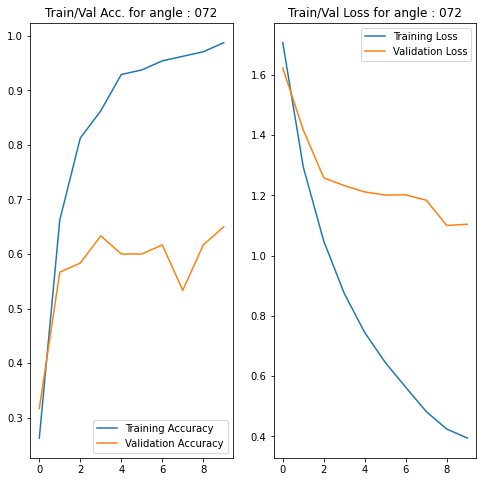

Epoch 1/10
30/30 [==============================] - 131s 4s/step - loss: 1.7476 - accuracy: 0.2751 - val_loss: 1.2975 - val_accuracy: 0.5833
Epoch 2/10
30/30 [==============================] - 4s 120ms/step - loss: 1.3079 - accuracy: 0.5941 - val_loss: 1.1096 - val_accuracy: 0.5667
Epoch 3/10
30/30 [==============================] - 4s 120ms/step - loss: 1.0283 - accuracy: 0.7055 - val_loss: 1.0368 - val_accuracy: 0.7167
Epoch 4/10
30/30 [==============================] - 4s 120ms/step - loss: 0.8504 - accuracy: 0.8357 - val_loss: 0.9966 - val_accuracy: 0.6333
Epoch 5/10
30/30 [==============================] - 4s 123ms/step - loss: 0.7189 - accuracy: 0.8288 - val_loss: 0.9871 - val_accuracy: 0.6333
Epoch 6/10
30/30 [==============================] - 4s 120ms/step - loss: 0.6506 - accuracy: 0.8968 - val_loss: 1.0226 - val_accuracy: 0.6000
Epoch 7/10
30/30 [==============================] - 4s 119ms/step - loss: 0.6063 - accuracy: 0.8784 - val_loss: 0.8662 - val_accuracy: 0.7167
Epoch 8

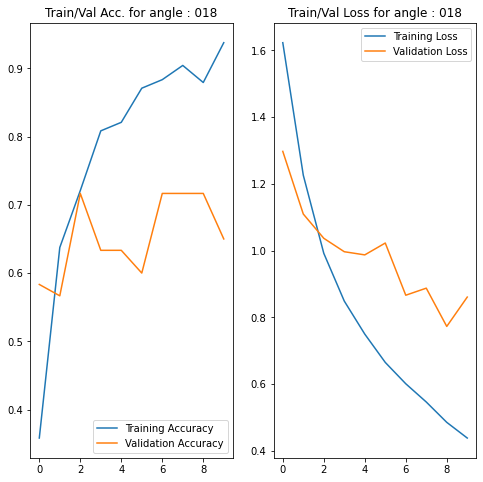

Epoch 1/10
30/30 [==============================] - 123s 4s/step - loss: 1.7259 - accuracy: 0.2732 - val_loss: 1.6077 - val_accuracy: 0.2833
Epoch 2/10
30/30 [==============================] - 4s 120ms/step - loss: 1.2864 - accuracy: 0.6680 - val_loss: 1.4249 - val_accuracy: 0.5167
Epoch 3/10
30/30 [==============================] - 4s 120ms/step - loss: 1.0278 - accuracy: 0.7280 - val_loss: 1.4360 - val_accuracy: 0.5167
Epoch 4/10
30/30 [==============================] - 4s 120ms/step - loss: 0.8597 - accuracy: 0.8134 - val_loss: 1.3458 - val_accuracy: 0.5667
Epoch 5/10
30/30 [==============================] - 4s 119ms/step - loss: 0.7464 - accuracy: 0.8648 - val_loss: 1.3548 - val_accuracy: 0.3667
Epoch 6/10
30/30 [==============================] - 4s 120ms/step - loss: 0.6479 - accuracy: 0.9056 - val_loss: 1.1801 - val_accuracy: 0.6000
Epoch 7/10
30/30 [==============================] - 4s 121ms/step - loss: 0.5537 - accuracy: 0.8724 - val_loss: 1.2994 - val_accuracy: 0.5667
Epoch 8

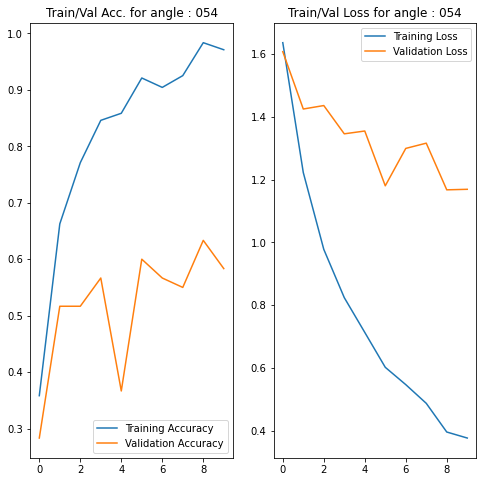

Epoch 1/10
30/30 [==============================] - 123s 4s/step - loss: 1.8400 - accuracy: 0.2321 - val_loss: 1.7322 - val_accuracy: 0.1833
Epoch 2/10
30/30 [==============================] - 4s 121ms/step - loss: 1.3516 - accuracy: 0.5734 - val_loss: 1.5100 - val_accuracy: 0.3500
Epoch 3/10
30/30 [==============================] - 4s 119ms/step - loss: 1.0197 - accuracy: 0.7598 - val_loss: 1.4612 - val_accuracy: 0.3000
Epoch 4/10
30/30 [==============================] - 4s 121ms/step - loss: 0.8929 - accuracy: 0.8354 - val_loss: 1.3301 - val_accuracy: 0.4667
Epoch 5/10
30/30 [==============================] - 4s 121ms/step - loss: 0.6653 - accuracy: 0.9121 - val_loss: 1.3184 - val_accuracy: 0.5000
Epoch 6/10
30/30 [==============================] - 4s 119ms/step - loss: 0.5847 - accuracy: 0.9320 - val_loss: 1.3653 - val_accuracy: 0.3667
Epoch 7/10
30/30 [==============================] - 4s 120ms/step - loss: 0.4969 - accuracy: 0.9234 - val_loss: 1.1795 - val_accuracy: 0.5333
Epoch 8

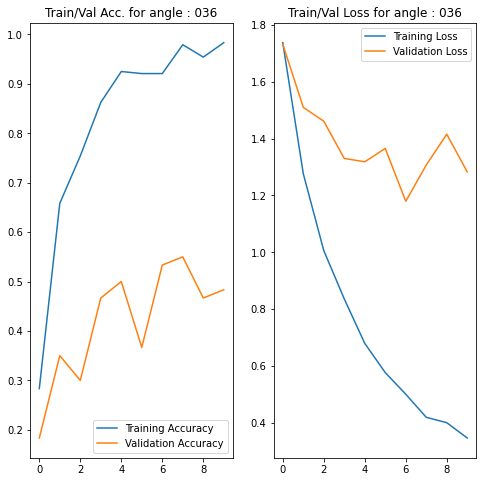

Epoch 1/10
30/30 [==============================] - 144s 4s/step - loss: 1.8858 - accuracy: 0.2063 - val_loss: 1.5363 - val_accuracy: 0.4667
Epoch 2/10
30/30 [==============================] - 4s 119ms/step - loss: 1.2977 - accuracy: 0.7150 - val_loss: 1.5302 - val_accuracy: 0.3333
Epoch 3/10
30/30 [==============================] - 4s 120ms/step - loss: 1.0785 - accuracy: 0.7678 - val_loss: 1.3666 - val_accuracy: 0.4500
Epoch 4/10
30/30 [==============================] - 4s 121ms/step - loss: 0.7945 - accuracy: 0.9387 - val_loss: 1.3134 - val_accuracy: 0.4833
Epoch 5/10
30/30 [==============================] - 4s 120ms/step - loss: 0.6436 - accuracy: 0.9499 - val_loss: 1.2683 - val_accuracy: 0.4333
Epoch 6/10
30/30 [==============================] - 4s 119ms/step - loss: 0.5501 - accuracy: 0.9436 - val_loss: 1.2682 - val_accuracy: 0.4500
Epoch 7/10
30/30 [==============================] - 4s 120ms/step - loss: 0.4925 - accuracy: 0.9614 - val_loss: 1.1106 - val_accuracy: 0.5333
Epoch 8

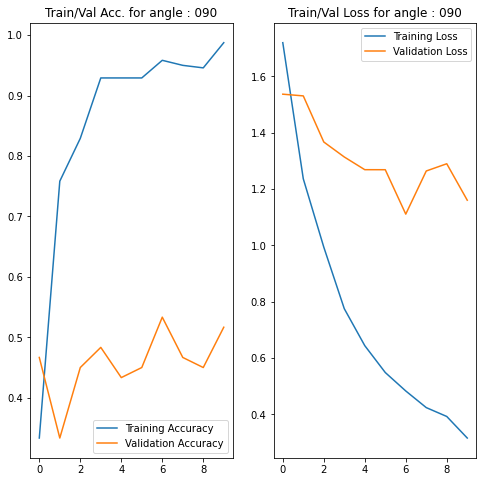

Epoch 1/10
30/30 [==============================] - 138s 4s/step - loss: 2.0104 - accuracy: 0.1635 - val_loss: 1.6582 - val_accuracy: 0.2500
Epoch 2/10
30/30 [==============================] - 4s 127ms/step - loss: 1.4535 - accuracy: 0.5299 - val_loss: 1.4669 - val_accuracy: 0.2833
Epoch 3/10
30/30 [==============================] - 4s 122ms/step - loss: 1.1211 - accuracy: 0.7110 - val_loss: 1.2941 - val_accuracy: 0.5667
Epoch 4/10
30/30 [==============================] - 4s 120ms/step - loss: 0.9082 - accuracy: 0.7793 - val_loss: 1.3642 - val_accuracy: 0.3833
Epoch 5/10
30/30 [==============================] - 4s 118ms/step - loss: 0.7889 - accuracy: 0.8038 - val_loss: 1.3582 - val_accuracy: 0.4667
Epoch 6/10
30/30 [==============================] - 4s 119ms/step - loss: 0.5980 - accuracy: 0.8959 - val_loss: 1.2543 - val_accuracy: 0.4333
Epoch 7/10
30/30 [==============================] - 4s 119ms/step - loss: 0.5392 - accuracy: 0.9413 - val_loss: 1.2629 - val_accuracy: 0.3667
Epoch 8

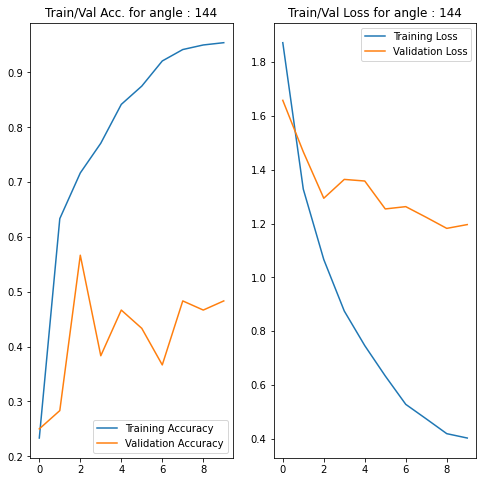

Epoch 1/10
30/30 [==============================] - 134s 4s/step - loss: 1.7267 - accuracy: 0.3000 - val_loss: 1.2761 - val_accuracy: 0.4000
Epoch 2/10
30/30 [==============================] - 4s 120ms/step - loss: 1.1698 - accuracy: 0.6648 - val_loss: 0.9995 - val_accuracy: 0.6833
Epoch 3/10
30/30 [==============================] - 4s 120ms/step - loss: 0.8863 - accuracy: 0.7862 - val_loss: 0.9023 - val_accuracy: 0.7500
Epoch 4/10
30/30 [==============================] - 4s 119ms/step - loss: 0.7271 - accuracy: 0.8082 - val_loss: 0.9687 - val_accuracy: 0.7167
Epoch 5/10
30/30 [==============================] - 4s 119ms/step - loss: 0.6137 - accuracy: 0.8811 - val_loss: 0.8006 - val_accuracy: 0.7833
Epoch 6/10
30/30 [==============================] - 4s 119ms/step - loss: 0.5116 - accuracy: 0.9139 - val_loss: 0.7753 - val_accuracy: 0.7667
Epoch 7/10
30/30 [==============================] - 4s 118ms/step - loss: 0.3716 - accuracy: 0.9382 - val_loss: 0.6562 - val_accuracy: 0.8000
Epoch 8

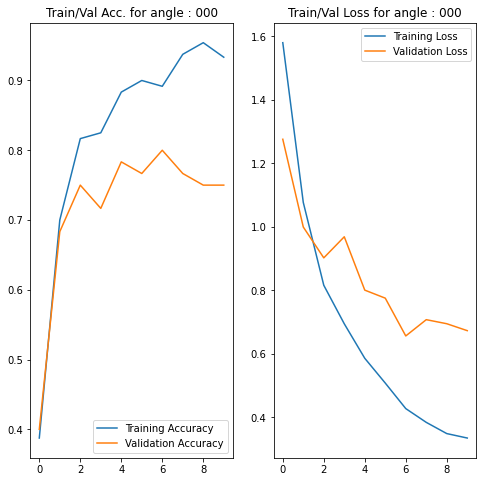

Epoch 1/10
30/30 [==============================] - 153s 5s/step - loss: 1.7953 - accuracy: 0.2437 - val_loss: 1.2715 - val_accuracy: 0.8500
Epoch 2/10
30/30 [==============================] - 4s 123ms/step - loss: 1.2890 - accuracy: 0.6288 - val_loss: 1.1082 - val_accuracy: 0.7333
Epoch 3/10
30/30 [==============================] - 4s 121ms/step - loss: 1.0416 - accuracy: 0.7814 - val_loss: 1.0823 - val_accuracy: 0.7167
Epoch 4/10
30/30 [==============================] - 4s 120ms/step - loss: 0.8221 - accuracy: 0.8298 - val_loss: 0.9351 - val_accuracy: 0.7667
Epoch 5/10
30/30 [==============================] - 4s 121ms/step - loss: 0.7175 - accuracy: 0.9104 - val_loss: 0.9988 - val_accuracy: 0.7500
Epoch 6/10
30/30 [==============================] - 4s 119ms/step - loss: 0.6248 - accuracy: 0.9418 - val_loss: 0.8410 - val_accuracy: 0.8500
Epoch 7/10
30/30 [==============================] - 4s 120ms/step - loss: 0.5573 - accuracy: 0.9183 - val_loss: 0.8651 - val_accuracy: 0.7833
Epoch 8

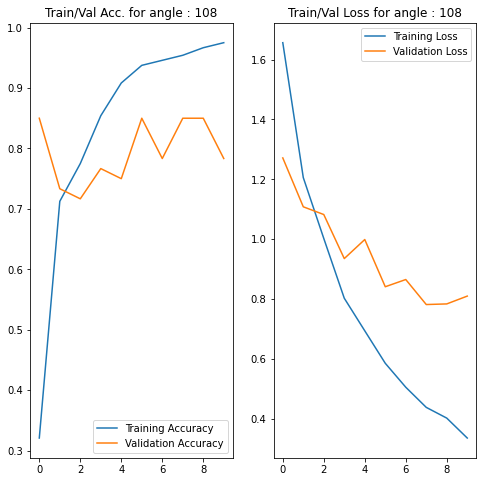

Epoch 1/10
30/30 [==============================] - 134s 4s/step - loss: 1.7460 - accuracy: 0.2646 - val_loss: 1.3210 - val_accuracy: 0.3833
Epoch 2/10
30/30 [==============================] - 4s 121ms/step - loss: 1.1878 - accuracy: 0.6148 - val_loss: 1.0847 - val_accuracy: 0.6000
Epoch 3/10
30/30 [==============================] - 4s 122ms/step - loss: 0.9305 - accuracy: 0.6726 - val_loss: 1.0773 - val_accuracy: 0.6167
Epoch 4/10
30/30 [==============================] - 4s 119ms/step - loss: 0.7185 - accuracy: 0.8362 - val_loss: 1.0126 - val_accuracy: 0.5500
Epoch 5/10
30/30 [==============================] - 4s 118ms/step - loss: 0.6181 - accuracy: 0.9049 - val_loss: 0.9270 - val_accuracy: 0.7167
Epoch 6/10
30/30 [==============================] - 4s 120ms/step - loss: 0.5587 - accuracy: 0.9260 - val_loss: 0.8957 - val_accuracy: 0.7000
Epoch 7/10
30/30 [==============================] - 4s 122ms/step - loss: 0.5118 - accuracy: 0.9264 - val_loss: 0.7843 - val_accuracy: 0.7333
Epoch 8

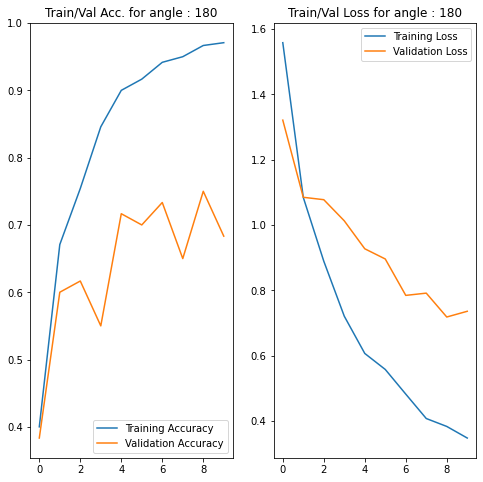

In [14]:
for angle in angles:
  model1=tf.keras.applications.NASNetMobile(
    include_top=False, weights='imagenet', 
     pooling='avg')
  model1.trainable = False
  
  model = keras.Sequential([model1,layers.Dense(6,activation='softmax')])
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  
  history=model.fit(train_gen[angle],validation_data=val_gen[angle],epochs=10,callbacks=[c1,c2])

  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(10)

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy ')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Train/Val Acc. for angle : {}'.format(angle))

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Train/Val Loss for angle : {}'.format(angle))
  plt.show()